# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +28.46641566597                   -1.44    5.47s
  2   +20.01651435000        0.93       -0.89   12.6ms
  3   +14.52457737213        0.74       -0.48   12.4ms
  4   +10.99498964743        0.55       -0.26   12.5ms
  5   +10.27752487268       -0.14       -0.59   10.0ms
  6   +9.663518810533       -0.21       -0.84   10.0ms
  7   +9.197732625211       -0.33       -0.92   10.0ms
  8   +8.867102067058       -0.48       -0.94   10.1ms
  9   +8.681794731955       -0.73       -1.07   57.8ms
 10   +8.522840103920       -0.80       -1.09   10.5ms
 11   +8.406784928869       -0.94       -0.98   10.3ms
 12   +8.286293583676       -0.92       -0.98   10.1ms
 13   +8.189477711849       -1.01       -1.10   7.62ms
 14   +8.117732290455       -1.14       -1.07   7.64ms
 15   +8.063115792227       -1.26       -0.82   10.0ms
 16   +8.018636819797       -1.35       -1.14   7.61ms
 17   +7.99

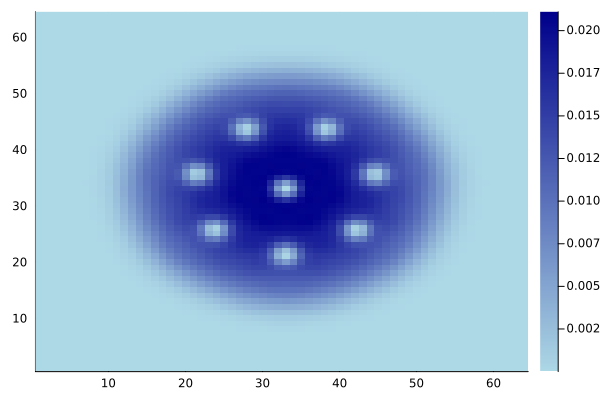

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)